In [1]:
import contextily as cx
import geopandas
import matplotlib.pyplot as plt
from shapely.geometry import MultiPolygon, Polygon
from shapely.wkt import loads as from_wkt
from project.models import Project


ign_url = (
    "https://wxs.ign.fr/ortho/geoportail/wmts?"
    "&REQUEST=GetTile&SERVICE=WMTS&VERSION=1.0.0&TILEMATRIXSET=PM"
    "&LAYER=ORTHOIMAGERY.ORTHOPHOTOS&STYLE=normal&FORMAT=image/jpeg"
    "&TILECOL={x}&TILEROW={y}&TILEMATRIX={z}"
)

In [2]:
filepath = "../../public_data/local_data/obs_artif_conso_com_2009_2021/obs_artif_conso_com_2009_2021.shp"
gdf = geopandas.read_file(filepath)
gdf.crs

<Derived Projected CRS: EPSG:2154>
Name: RGF93 v1 / Lambert-93
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: France - onshore and offshore, mainland and Corsica.
- bounds: (-9.86, 41.15, 10.38, 51.56)
Coordinate Operation:
- name: Lambert-93
- method: Lambert Conic Conformal (2SP)
Datum: Reseau Geodesique Francais 1993 v1
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [3]:
diagnostic = Project.objects.get(id=7)
print(diagnostic.id, diagnostic.name)

geom = diagnostic.combined_emprise.transform("2154", clone=True)
srid, wkt = geom.ewkt.split(";")
polygons = from_wkt(wkt)

selection = gdf.intersects(polygons)
grand_coeur = gdf.loc[selection]
grand_coeur

7 Diagnostic de Corse-du-Sud


,idcom,idcomtxt,idreg,idregtxt,iddep,iddeptxt,epci21,epci21txt,scot,aav2020,...,men18,men1318,emp13,emp18,emp1318,mepart1318,menhab1318,artpop1318,surfcom202,geometry
10540,2A001,Afa,94,Corse,2A,Corse-du-Sud,242010056,CA du Pays Ajaccien,SCoT du Bassin de vie Ajaccien,098,...,1336,140,526,705,179,17.03,8.28,829.04,11984560.0,"POLYGON ((1180163.000 6112572.000, 1180328.000..."
10541,2A004,Ajaccio,94,Corse,2A,Corse-du-Sud,242010056,CA du Pays Ajaccien,SCoT du Bassin de vie Ajaccien,098,...,30064,1750,35136,37211,2075,130.72,100.04,88.40,83142152.0,"MULTIPOLYGON (((1168316.000 6106418.000, 11682..."
10542,2A006,Alata,94,Corse,2A,Corse-du-Sud,242010056,CA du Pays Ajaccien,SCoT du Bassin de vie Ajaccien,098,...,1332,115,444,397,-47,4.21,8.01,667.66,30651059.0,"POLYGON ((1180371.000 6114155.000, 1180381.000..."
10543,2A008,Albitreccia,94,Corse,2A,Corse-du-Sud,200038958,CC de la Pieve de l'Ornano et du Taravo,None,098,...,765,100,286,312,26,23.59,19.45,365.82,45990942.0,"POLYGON ((1187562.000 6098293.000, 1187497.000..."
10544,2A011,Altagène,94,Corse,2A,Corse-du-Sud,242000495,CC de l'Alta Rocca,None,540,...,27,1,10,4,-6,-177.30,35.46,47.00,4759389.0,"POLYGON ((1204314.000 6086986.000, 1204324.000..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10843,2B283,Solaro,94,Corse,2B,Haute-Corse,200033827,CC de Fium'orbu Castellu,None,N/A,...,335,5,82,104,22,4.39,0.84,2676.78,94370442.0,"POLYGON ((1218294.000 6106549.000, 1218305.000..."
10884,2B341,Venaco,94,Corse,2B,Haute-Corse,242020071,CC du Centre Corse,None,414,...,376,-13,141,129,-12,-47.58,-24.74,-103.02,53622719.0,"POLYGON ((1199675.000 6142195.000, 1199685.000..."
10893,2B354,Vivario,94,Corse,2B,Haute-Corse,242020071,CC du Centre Corse,None,414,...,174,-22,176,171,-5,0.00,0.00,0.00,78594304.0,"POLYGON ((1202508.000 6133738.000, 1202519.000..."
10898,2B365,San-Gavino-di-Fiumorbo,94,Corse,2B,Haute-Corse,200033827,CC de Fium'orbu Castellu,None,N/A,...,60,-16,14,9,-5,0.00,0.00,0.00,22558461.0,"POLYGON ((1216531.000 6114676.000, 1216540.000..."


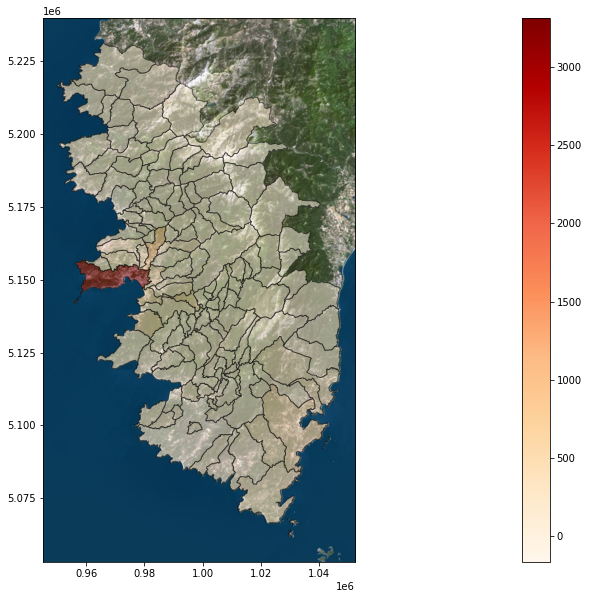

In [4]:
grand_coeur = grand_coeur.to_crs(epsg=3857)
ax = grand_coeur.plot("pop1318", legend=True, cmap='OrRd', figsize=(60, 10), alpha=0.5, edgecolor='k')
cx.add_basemap(ax, source=ign_url)

In [5]:
d = {'col1': ['emprise diagnostic',], 'geometry': [polygons,]}
gdf_emprise = geopandas.GeoDataFrame(d, crs="EPSG:2154").to_crs(epsg=3857)
gdf_emprise

,col1,geometry
0,emprise diagnostic,"MULTIPOLYGON (((950542.647 5215751.499, 950531..."


<AxesSubplot:>

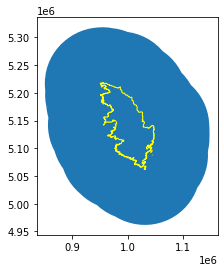

In [6]:
ax = gdf_emprise.buffer(100000).plot()
gdf_emprise.plot(ax=ax, edgecolor='yellow')

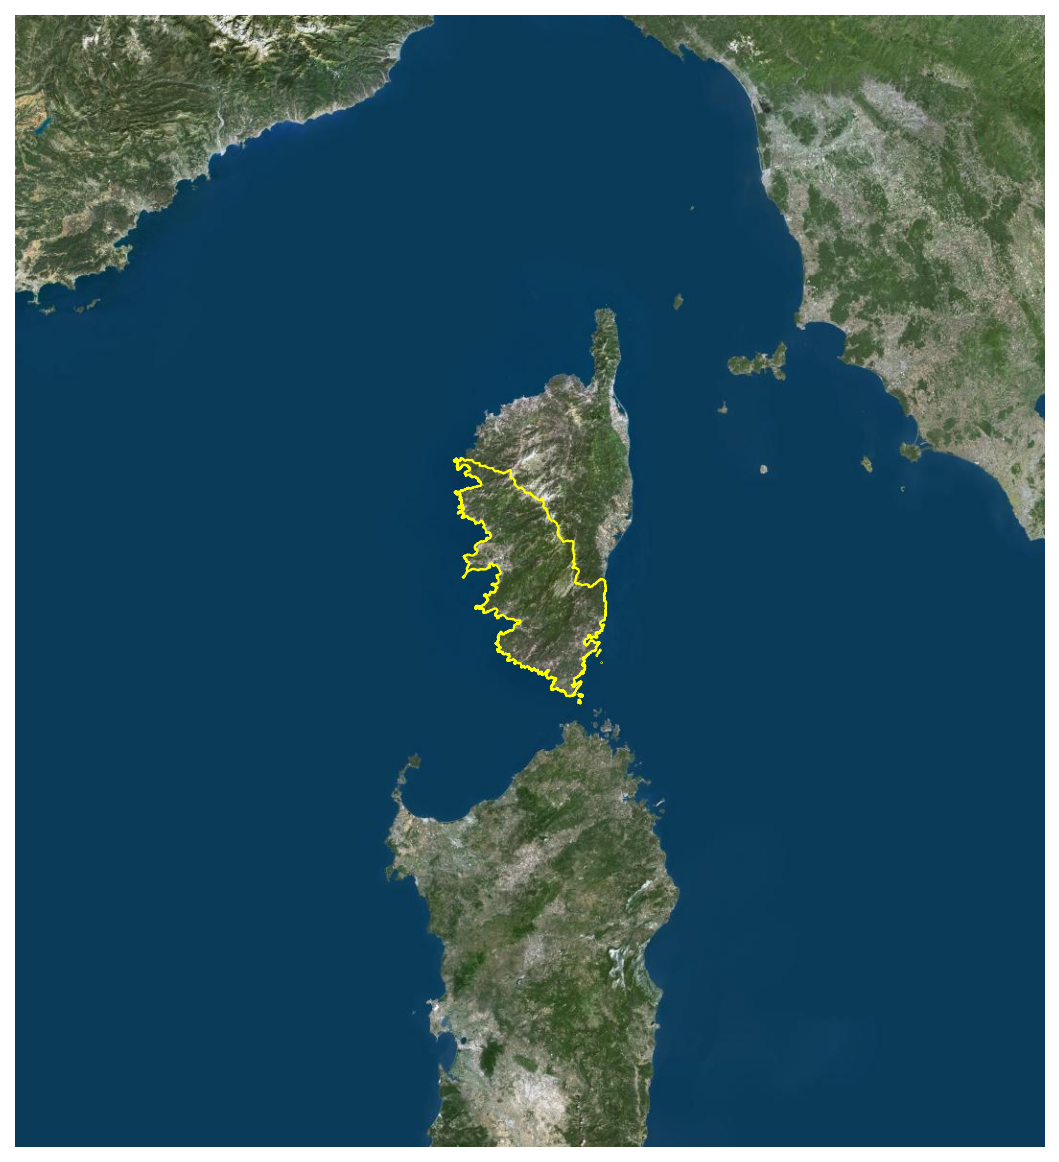

In [7]:
fig, ax = plt.subplots(figsize=(60, 10))
plt.axis('off')
fig.set_dpi(150)

gdf_emprise.buffer(250000).plot(ax=ax, facecolor='none', edgecolor='none')
gdf_emprise.plot(ax=ax, facecolor='none', edgecolor='yellow')
cx.add_basemap(ax, source=ign_url)

plt.savefig('foo.png', bbox_inches="tight")